In [36]:
import torch
import os
import time
import torchvision

import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm
from torch.autograd import Variable

from gatys import Gatys
from AdaIN import AdaIN

In [37]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


## AdaIN on Chinese Art Dataset 

1. Here we used 50 content images and one unique style

In [38]:
content_dir = "./Chinese_art_dataset/content_images/"
style_dir = "./Chinese_art_dataset/style_images/wuguanzhong_33.jpg"
save_path = "./Chinese_art_dataset/generated_images_AdaIN"
content_images = os.listdir(content_dir)
style_image = Image.open(style_dir).convert("RGB")

In [39]:
AdaIN_method = AdaIN().to(device)

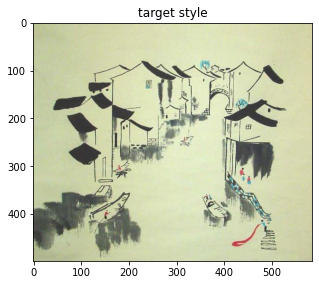

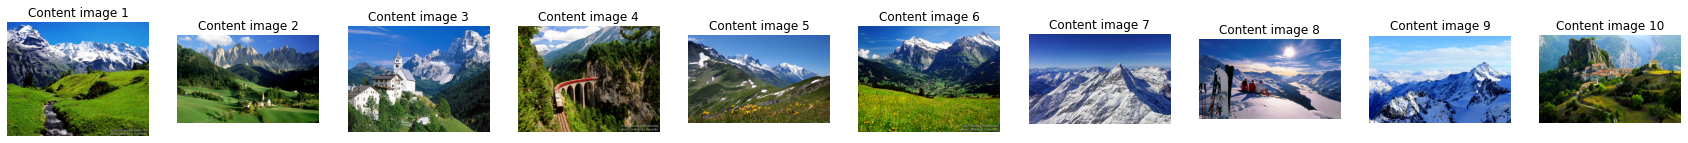

In [40]:
# Target Style
plt.figure(figsize=(5,5))
plt.imshow(style_image)
plt.title('target style')
plt.show()

#Samples from content images
nb_samples = 10
plt.figure(figsize=(3*nb_samples, 3))  
for i in range(nb_samples):
    image_path = os.path.join(content_dir, content_images[i])
    image = Image.open(image_path)
    
    plt.subplot(1, nb_samples, i+1)  
    plt.imshow(image)
    plt.axis('off')  
    plt.title(f'Content image {i+1}')
plt.show()

Content Images: 100%|██████████| 50/50 [01:49<00:00,  2.19s/it]


Average computation time per image: 2.194017834663391


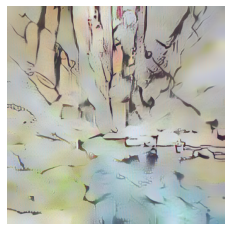

In [6]:
total_time = 0
num_pairs = 0
t0= time.time()
for content_image_name in tqdm(content_images, desc="Content Images"):
    content_image_path = os.path.join(content_dir, content_image_name)
    content_image = Image.open(content_image_path).convert("RGB")
    out_image = AdaIN_method.transfer_style(content_image, style_image)
    AdaIN_method.display_image(out_image)
    AdaIN_method.save_output_image(out_image, output_dir=save_path, filename=content_image_name)
tf= time.time()

print("Average computation time per image:", (tf-t0)/len(content_images))

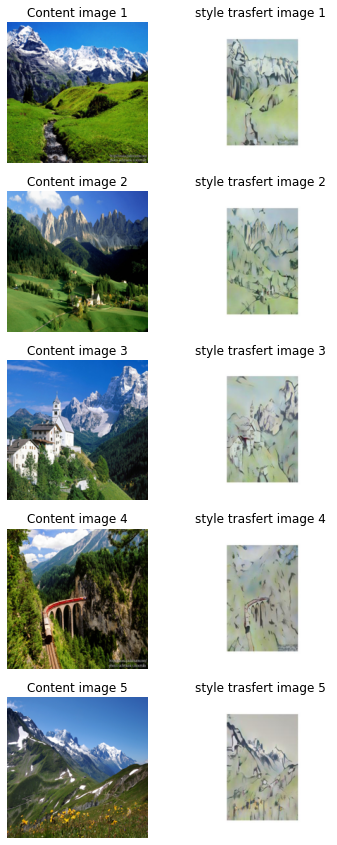

In [42]:
nb_samples = 5
plt.figure(figsize=(6, 3*nb_samples))  
for i in range(nb_samples):
    image_path = os.path.join(content_dir, content_images[i])
    image = Image.open(image_path).resize((200, 200))
    style_path = os.path.join(save_path, content_images[i])
    style = Image.open(style_path).resize((200, 200))
    plt.subplot(nb_samples,2, 2*i+1)  
    plt.imshow(image)
    plt.axis('off')  
    plt.title(f'Content image {i+1}')
    plt.subplot(nb_samples,2, 2*i+2)  
    plt.imshow(style)
    plt.axis('off')  
    plt.title(f'style trasfert image {i+1}')
plt.show()



2. Here we used 4 content images and 4 styles

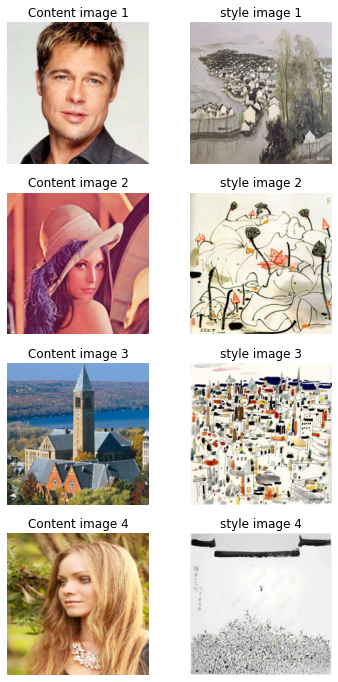

In [52]:
content_dir = "./Chinese_art_dataset/content_images_bis/"
style_dir = "./Chinese_art_dataset/style_images/"
save_path = "./Chinese_art_dataset/generated_images_AdaIN_2"
content_images = os.listdir(content_dir)
style_images = os.listdir(style_dir)[7:11]
nb_samples = 4
plt.figure(figsize=(6, 3*nb_samples))  
for i in range(nb_samples):
    image_path = os.path.join(content_dir, content_images[i])
    image = Image.open(image_path).resize((200, 200))
    style_path = os.path.join(style_dir, style_images[i])
    style = Image.open(style_path).resize((200, 200))
    plt.subplot(nb_samples,2, 2*i+1)  
    plt.imshow(image)
    plt.axis('off')  
    plt.title(f'Content image {i+1}')
    plt.subplot(nb_samples,2, 2*i+2)  
    plt.imshow(style)
    plt.axis('off')  
    plt.title(f'style image {i+1}')
plt.show()


Content Images: 100%|██████████| 4/4 [00:10<00:00,  2.62s/it]


Average computation time per image: 2.6158255338668823


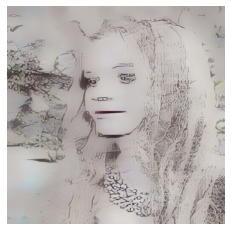

In [53]:
total_time = 0
num_pairs = 0
t0= time.time()
for content_image_name in tqdm(content_images, desc="Content Images"):
    content_image_path = os.path.join(content_dir, content_image_name)
    content_image = Image.open(content_image_path).convert("RGB")
    for style_image_name in tqdm(style_images, desc="Style Images", leave=False):
        style_image_path = os.path.join(style_dir, style_image_name)
        style_image = Image.open(style_image_path).convert("RGB")
        out_image = AdaIN_method.transfer_style(content_image, style_image)
        AdaIN_method.save_output_image(out_image, output_dir=save_path, filename=content_image_name+"-"+style_image_name)
tf= time.time()

print("Average computation time per image:", (tf-t0)/len(content_images))

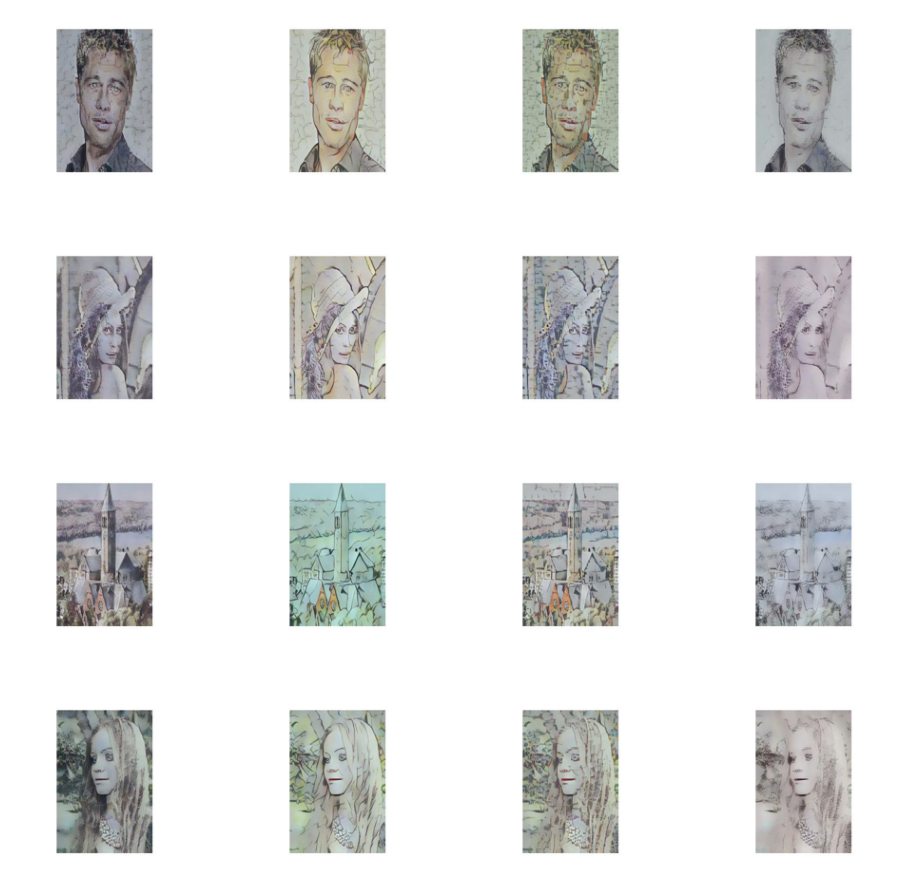

In [55]:
## Same line : same content different styles
## Same column : same style different columns

generated_images = os.listdir(save_path)
plt.figure(figsize=(16, 16))  
for i in range(16):
    style_path = os.path.join(save_path, generated_images[i])
    style = Image.open(style_path).resize((200, 200))
    plt.subplot(4,4, i+1)  
    plt.imshow(style)
    plt.axis('off')  
plt.show()

## Gatys et al method on Chinese Art Dataset 

Here we used 50 content images and one unique style. The optimization process was performed for 200 iterations

In [56]:
gatys_method = Gatys().to(device)
save_path = "./Chinese_art_dataset/generated_images_gatys"

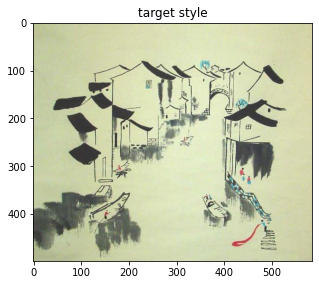

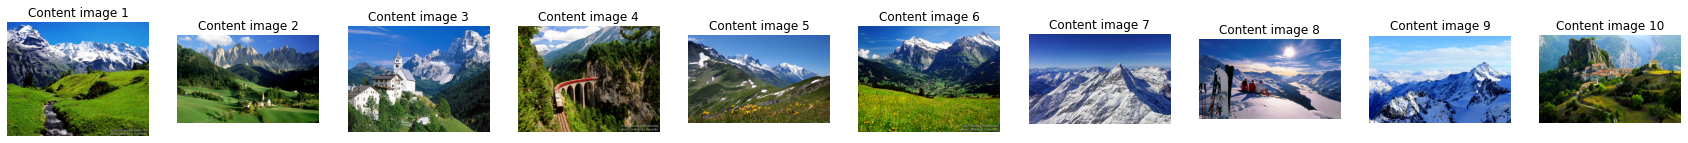

In [11]:
# Target Style
plt.figure(figsize=(5,5))
plt.imshow(style_image)
plt.title('target style')
plt.show()

#Samples from content images
nb_samples = 10
plt.figure(figsize=(3*nb_samples, 3))  
for i in range(nb_samples):
    image_path = os.path.join(content_dir, content_images[i])
    image = Image.open(image_path)
    
    plt.subplot(1, nb_samples, i+1)  
    plt.imshow(image)
    plt.axis('off')  
    plt.title(f'Content image {i+1}')
plt.show()

Content Images: 100%|██████████| 50/50 [40:47<00:00, 48.95s/it]


Average computation time per image: 48.94886817932129


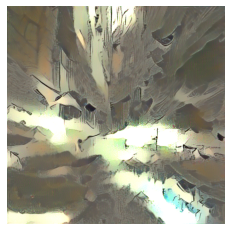

In [12]:
total_time = 0
num_pairs = 0
t0= time.time()
for content_image_name in tqdm(content_images, desc="Content Images"):
    content_image_path = os.path.join(content_dir, content_image_name)
    content_image = Image.open(content_image_path).convert("RGB")
    opt_img = gatys_method.prep(content_image).unsqueeze(0).data.clone() #initialization
    out_image = gatys_method.transfer_style(content_image, style_image, opt_img=opt_img,show_iter=0, max_iter=200)
    gatys_method.display_image(out_image)
    gatys_method.save_output_image(out_image, output_dir=save_path, filename=content_image_name)
tf= time.time()

print("Average computation time per image:", (tf-t0)/len(content_images))

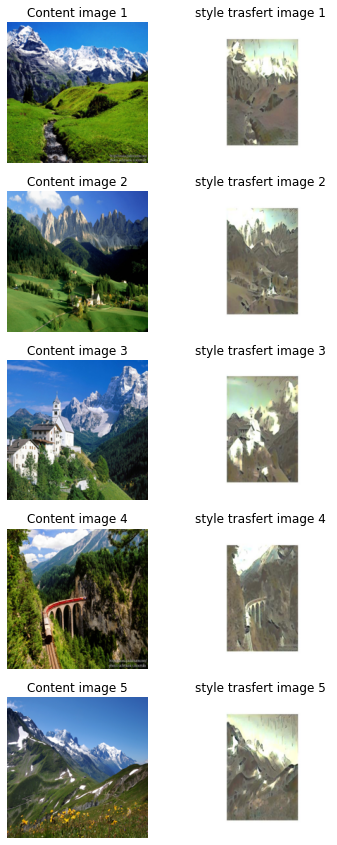

In [13]:
nb_samples = 5
plt.figure(figsize=(6, 3*nb_samples))  
for i in range(nb_samples):
    image_path = os.path.join(content_dir, content_images[i])
    image = Image.open(image_path).resize((200, 200))
    style_path = os.path.join(save_path, content_images[i])
    style = Image.open(style_path).resize((200, 200))
    plt.subplot(nb_samples,2, 2*i+1)  
    plt.imshow(image)
    plt.axis('off')  
    plt.title(f'Content image {i+1}')
    plt.subplot(nb_samples,2, 2*i+2)  
    plt.imshow(style)
    plt.axis('off')  
    plt.title(f'style trasfert image {i+1}')
plt.show()


2. Here we used 4 content images and 4 styles

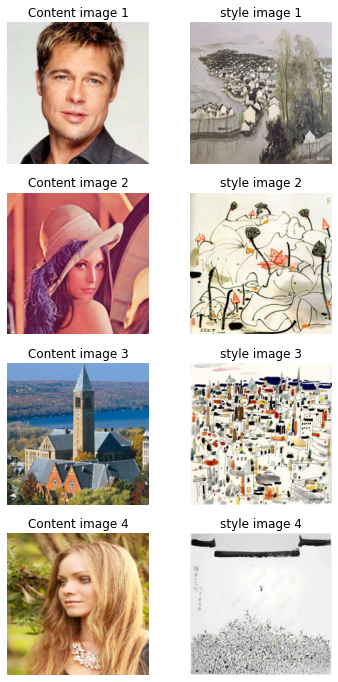

In [57]:
content_dir = "./Chinese_art_dataset/content_images_bis/"
style_dir = "./Chinese_art_dataset/style_images/"
save_path = "./Chinese_art_dataset/generated_images_gatys_2"
content_images = os.listdir(content_dir)
style_images = os.listdir(style_dir)[7:11]
nb_samples = 4
plt.figure(figsize=(6, 3*nb_samples))  
for i in range(nb_samples):
    image_path = os.path.join(content_dir, content_images[i])
    image = Image.open(image_path).resize((200, 200))
    style_path = os.path.join(style_dir, style_images[i])
    style = Image.open(style_path).resize((200, 200))
    plt.subplot(nb_samples,2, 2*i+1)  
    plt.imshow(image)
    plt.axis('off')  
    plt.title(f'Content image {i+1}')
    plt.subplot(nb_samples,2, 2*i+2)  
    plt.imshow(style)
    plt.axis('off')  
    plt.title(f'style image {i+1}')
plt.show()

Content Images: 100%|██████████| 4/4 [39:29<00:00, 592.34s/it]


Average computation time per image: 592.338456094265


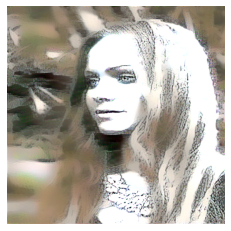

In [59]:
total_time = 0
num_pairs = 0
t0= time.time()
for content_image_name in tqdm(content_images, desc="Content Images"):
    content_image_path = os.path.join(content_dir, content_image_name)
    content_image = Image.open(content_image_path).convert("RGB")
    for style_image_name in tqdm(style_images, desc="Style Images", leave=False):
        style_image_path = os.path.join(style_dir, style_image_name)
        style_image = Image.open(style_image_path).convert("RGB")
        opt_img = gatys_method.prep(content_image).unsqueeze(0).data.clone() #initialization
        out_image = gatys_method.transfer_style(content_image, style_image, opt_img=opt_img,show_iter=0, max_iter=200)
        gatys_method.save_output_image(out_image, output_dir=save_path, filename=content_image_name+"-"+style_image_name)
tf= time.time()

print("Average computation time per image:", (tf-t0)/len(content_images))

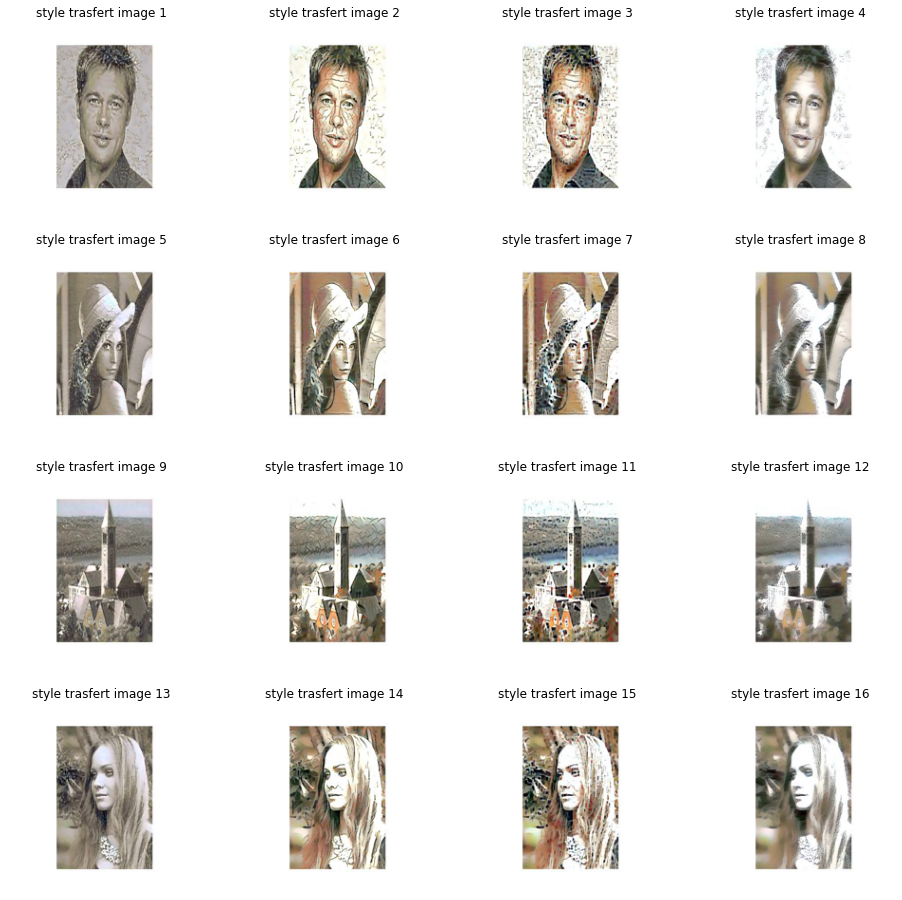

In [61]:
## Same line : same content different styles
## Same column : same style different columns

generated_images = os.listdir(save_path)
plt.figure(figsize=(16, 16))  
for i in range(16):
    style_path = os.path.join(save_path, generated_images[i])
    style = Image.open(style_path).resize((200, 200))
    plt.subplot(4,4, i+1)  
    plt.imshow(style)
    plt.axis('off')  
    plt.title(f'style trasfert image {i+1}')
plt.show()